## Import Statements

In [99]:
# imports required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Clustering algorithms 
from sklearn.cluster import AgglomerativeClustering, KMeans, Birch

# Used to find n_cluster amount
from sklearn.metrics import silhouette_score


# Used for scaling data
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# allows for viewing of entire dataset
pd.set_option('display.max_rows', None)

## Load Dataset

In [100]:
# uploading and coverting of iris.data file into pandas dataframe.
data = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

#### Utility Functions

In [101]:
# Scales dataset using standardScaler and returns to caller
def scaleData(dataset_features):
    std_scaler = StandardScaler().fit_transform(dataset_features)
    std_df = pd.DataFrame(std_scaler, columns=dataset_features.columns)
    
    return std_df

## Prepairing and Visualizing Dataset

In [102]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Check for null values

In [103]:
# checks if any null values are present in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Plot full dataset 

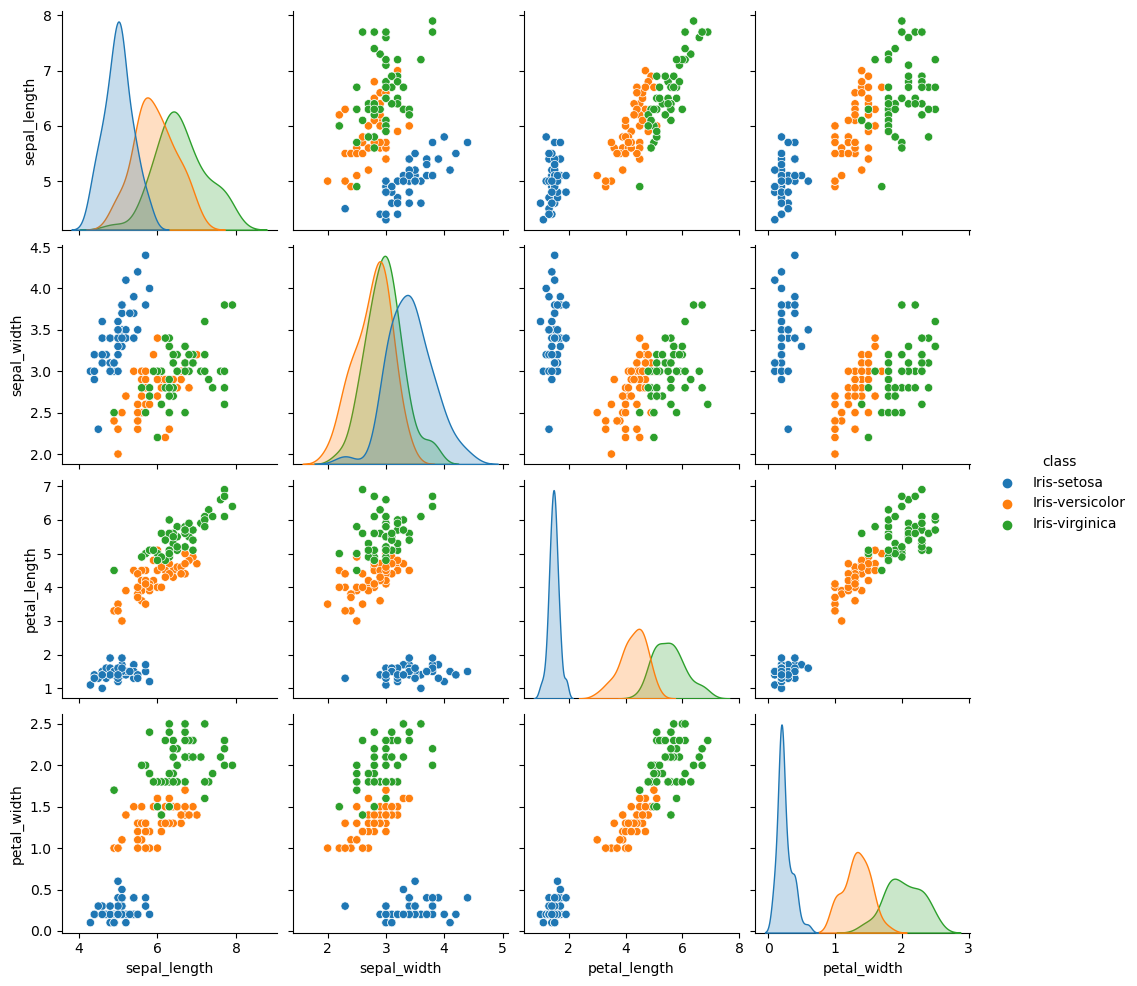

In [104]:
# plotting features of dataset with iris class type
sns.pairplot(data, hue="class")

plt.show()

### Dataset outliers

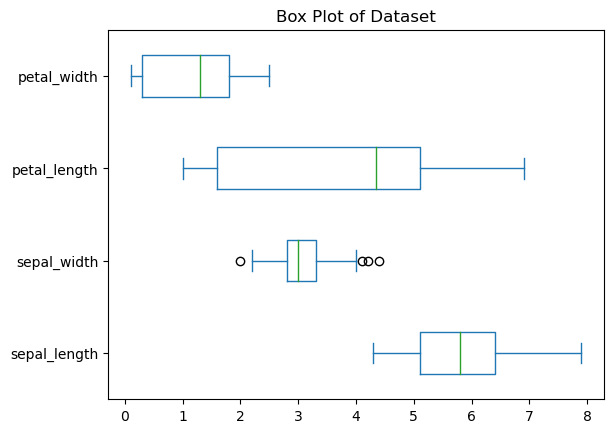

In [105]:
# creating box plots to show outliers in dataset
data.plot.box(vert=False, title="Box Plot of Dataset")
plt.show()

In [106]:
# removing sepal_width outliers from dataset

Q1 = data["sepal_width"].quantile(0.25)
Q3 = data["sepal_width"].quantile(0.75)
IQR = Q3 - Q1
    
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
        
df = data[~(( data["sepal_width"] < Lower_Fence) | (data["sepal_width"] > Upper_Fence))]

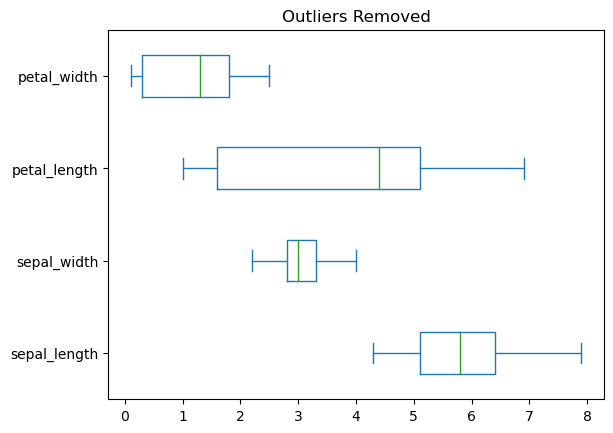

In [107]:
# Plotting dataset after removal of outliers
df.plot.box(vert=False, title="Outliers Removed")
plt.show()

### Splitting labels from dataset

In [108]:
# resets index of dataset after dropping the outliers
df = df.reset_index(drop=True)

# dataset labels
y = df["class"]

# dataset features
X = df.drop(columns=["class"])

# review features
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Scale dataset

In [109]:
# dataset features scaled by Standard scaler
scaled_data = scaleData(X)

# review data after scaling
scaled_data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899
5,-0.549605,2.191560,-1.203556,-1.081961
6,-1.512032,0.921846,-1.374878,-1.213930
7,-1.030819,0.921846,-1.317771,-1.345899
8,-1.752639,-0.347867,-1.374878,-1.345899
9,-1.151122,0.160019,-1.317771,-1.477867


### Silhouette scoring

In [110]:
# Using the silhouette score method to find correct n_cluster number to use for k-means

# range of possible clusters to try
cluster_range = list(range(2,10))

for i in cluster_range:
    # initiation of KMeans model using i as n_cluster parameter
    kMeans_model = KMeans(n_clusters=i)
    # fitting model to dataset
    preds = kMeans_model.fit_predict(X)
    # calculate and print silhouette score
    score = silhouette_score(scaled_data, preds)
    print("Number of clusters =", i , " silhouette score: ", score)

Number of clusters = 2  silhouette score:  0.5647756273365117
Number of clusters = 3  silhouette score:  0.4401876785758998
Number of clusters = 4  silhouette score:  0.35772189367202945
Number of clusters = 5  silhouette score:  0.3497207105661122
Number of clusters = 6  silhouette score:  0.29016456682991787
Number of clusters = 7  silhouette score:  0.3005212579806859
Number of clusters = 8  silhouette score:  0.2797089668280714
Number of clusters = 9  silhouette score:  0.3019596369017474



Because the silhouette score drops after 3 clusters, I will use 3 for the n_cluster parameters in all my clustering algorithms

## Modeling

### KMeans

In [111]:
# Initiate kMeans clustering model
kmeans = KMeans(n_clusters=3)
# fitting kMeans algorithm with scaled dataset
y_kMeans  = kmeans.fit_predict(scaled_data)
# view results
y_kMeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [112]:
# addition of cluster predictions to dataset
data_kMeans = scaled_data
data_kMeans["clusters"] = y_kMeans
# sort dataset by cluster values
data_kMeans = data_kMeans.sort_values(by=['clusters'])

# review dataset
data_kMeans

,sepal_length,sepal_width,petal_length,petal_width,clusters
103,1.736159,-0.347867,1.423380,0.765598,0
127,2.457980,1.937617,1.480488,1.029536,0
128,0.653429,-0.601809,1.023629,1.293473,0
66,0.051912,0.413961,0.566771,0.765598,0
131,2.217373,-0.093924,1.309166,1.425441,0
132,0.533125,0.921846,1.023629,1.557410,0
133,0.653429,0.160019,0.966522,0.765598,0
61,1.014339,0.160019,0.338341,0.237724,0
135,1.254946,0.160019,0.909414,1.161504,0
126,1.856463,-0.601809,1.309166,0.897567,0


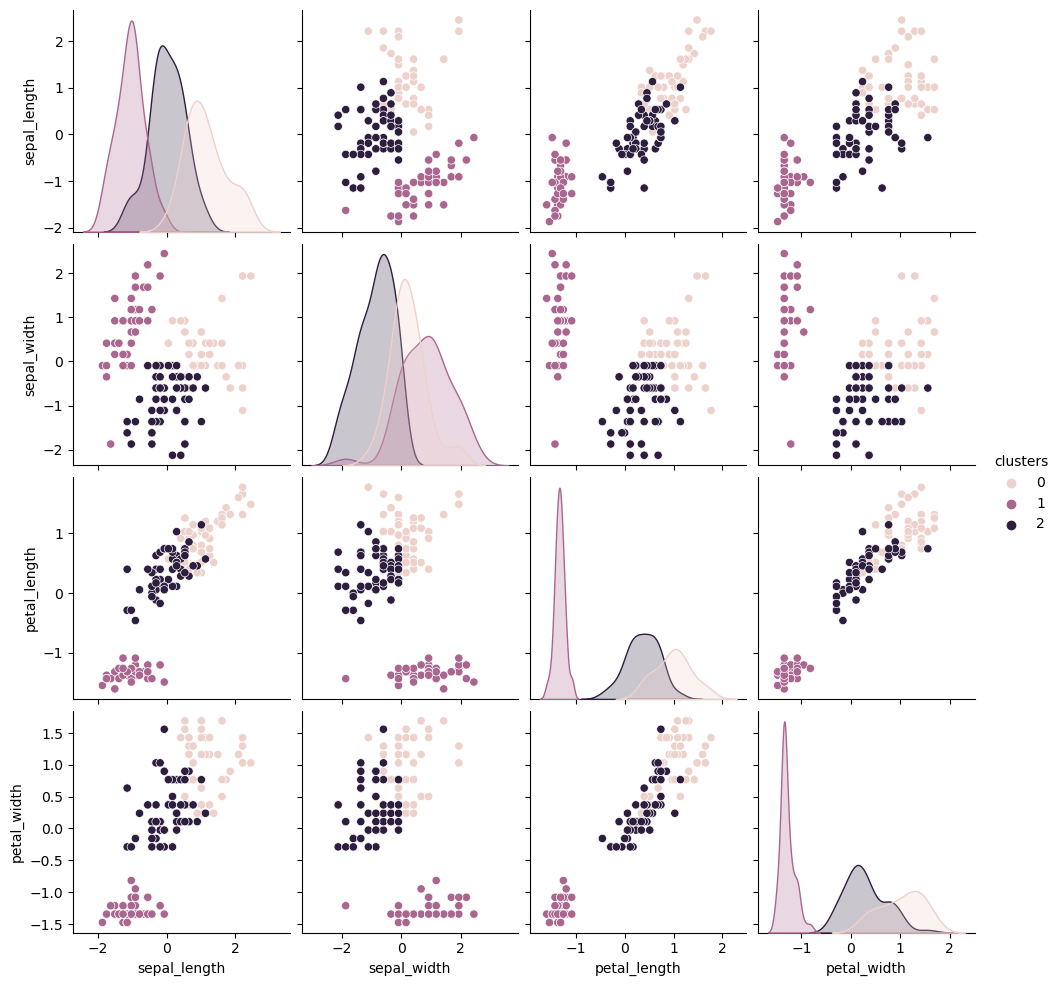

In [113]:
# plotting features of dataset against clusters
sns.pairplot(data_kMeans, hue="clusters")

plt.show()

In [114]:
# adding labels back to dataset
kMeans_completeDataset = data_kMeans
kMeans_completeDataset["class"] = y
# review complete dataset
kMeans_completeDataset

,sepal_length,sepal_width,petal_length,petal_width,clusters,class
103,1.736159,-0.347867,1.423380,0.765598,0,Iris-virginica
127,2.457980,1.937617,1.480488,1.029536,0,Iris-virginica
128,0.653429,-0.601809,1.023629,1.293473,0,Iris-virginica
66,0.051912,0.413961,0.566771,0.765598,0,Iris-versicolor
131,2.217373,-0.093924,1.309166,1.425441,0,Iris-virginica
132,0.533125,0.921846,1.023629,1.557410,0,Iris-virginica
133,0.653429,0.160019,0.966522,0.765598,0,Iris-virginica
61,1.014339,0.160019,0.338341,0.237724,0,Iris-versicolor
135,1.254946,0.160019,0.909414,1.161504,0,Iris-virginica
126,1.856463,-0.601809,1.309166,0.897567,0,Iris-virginica


### Model evaluation

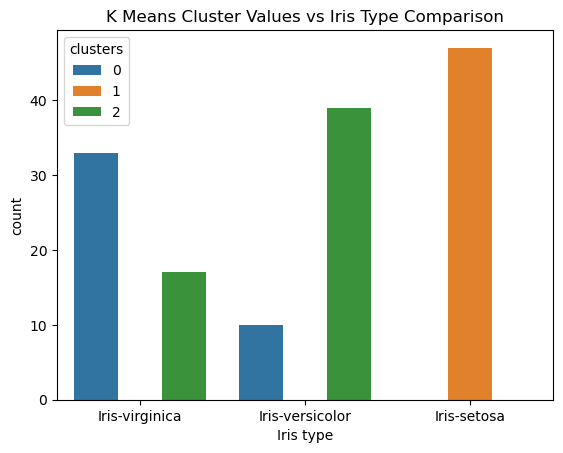

In [115]:
# plot evalulation of kMeans model
pl = sns.countplot(x=kMeans_completeDataset["class"], hue=kMeans_completeDataset["clusters"])
pl.set_title("K Means Cluster Values vs Iris Type Comparison")
pl.set_xlabel("Iris type")
plt.show()

### Agglomerative Clustering

In [116]:
# Initiate agglomerative clustering model
AC = AgglomerativeClustering(n_clusters=3)
# fitting AC model with scaled_data
y_AC = AC.fit_predict(scaled_data)
# review results
y_AC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [117]:
# adding predicted cluster values to dataset 
data_AC = scaled_data
data_AC["clusters"] = y_AC
# sort dataset by cluster values
data_AC = data_AC.sort_values(by=['clusters'])
# reviewing dataset
data_AC

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,-0.910515,1.175789,-1.374878,-1.345899,0
26,-0.790212,1.175789,-1.317771,-1.345899,0
27,-0.790212,0.921846,-1.374878,-1.345899,0
28,-1.391729,0.413961,-1.260664,-1.345899,0
29,-1.271426,0.160019,-1.260664,-1.345899,0
30,-0.549605,0.921846,-1.317771,-1.081961,0
31,-1.151122,0.160019,-1.317771,-1.477867,0
32,-1.030819,0.413961,-1.489093,-1.345899,0
33,-0.429302,1.175789,-1.431986,-1.345899,0
34,-1.151122,0.160019,-1.317771,-1.477867,0


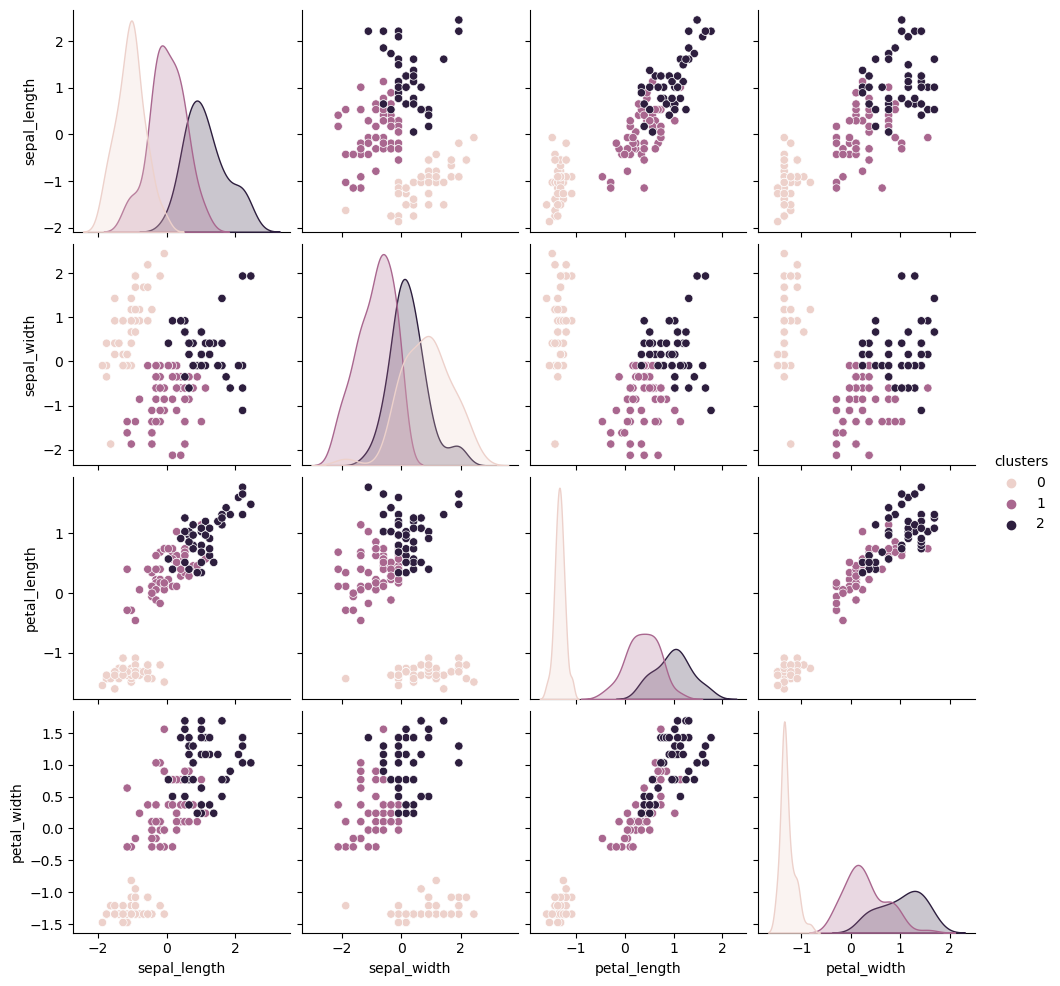

In [118]:
# plotting features of dataset against clusters
sns.pairplot(data_AC, hue="clusters")

plt.show()

In [119]:
# adding labels back to dataset
AC_completeDataset = data_kMeans
AC_completeDataset["class"] = y
# review complete dataset
AC_completeDataset

,sepal_length,sepal_width,petal_length,petal_width,clusters,class
103,1.736159,-0.347867,1.423380,0.765598,0,Iris-virginica
127,2.457980,1.937617,1.480488,1.029536,0,Iris-virginica
128,0.653429,-0.601809,1.023629,1.293473,0,Iris-virginica
66,0.051912,0.413961,0.566771,0.765598,0,Iris-versicolor
131,2.217373,-0.093924,1.309166,1.425441,0,Iris-virginica
132,0.533125,0.921846,1.023629,1.557410,0,Iris-virginica
133,0.653429,0.160019,0.966522,0.765598,0,Iris-virginica
61,1.014339,0.160019,0.338341,0.237724,0,Iris-versicolor
135,1.254946,0.160019,0.909414,1.161504,0,Iris-virginica
126,1.856463,-0.601809,1.309166,0.897567,0,Iris-virginica


### Model evaluation

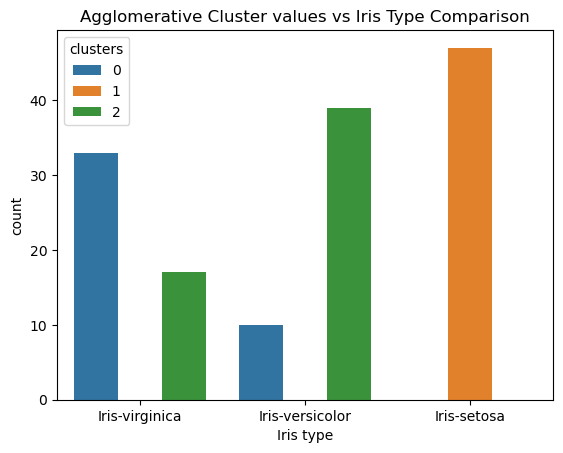

In [120]:
# plot comparing dataset labels with agglomerative cluster values
pl = sns.countplot(x=AC_completeDataset["class"], hue=AC_completeDataset["clusters"])
pl.set_title("Agglomerative Cluster values vs Iris Type Comparison")
pl.set_xlabel("Iris type")
plt.show()

### BIRCH

In [121]:
# initiation of Birch model
BC = Birch(n_clusters=3)
# fitting model with dataset
y_BC = BC.fit_predict(scaled_data)
# review results
y_BC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int64)

In [122]:
# adding predicted cluster values to dataset 
data_BC = scaled_data
data_BC["clusters"] = y_BC
# sort dataset by cluster values
data_BC = data_BC.sort_values(by=['clusters'])
# reviewing dataset
data_BC

,sepal_length,sepal_width,petal_length,petal_width,clusters
103,1.736159,-0.347867,1.423380,0.765598,0
127,2.457980,1.937617,1.480488,1.029536,0
128,0.653429,-0.601809,1.023629,1.293473,0
66,0.051912,0.413961,0.566771,0.765598,0
131,2.217373,-0.093924,1.309166,1.425441,0
132,0.533125,0.921846,1.023629,1.557410,0
133,0.653429,0.160019,0.966522,0.765598,0
61,1.014339,0.160019,0.338341,0.237724,0
135,1.254946,0.160019,0.909414,1.161504,0
126,1.856463,-0.601809,1.309166,0.897567,0


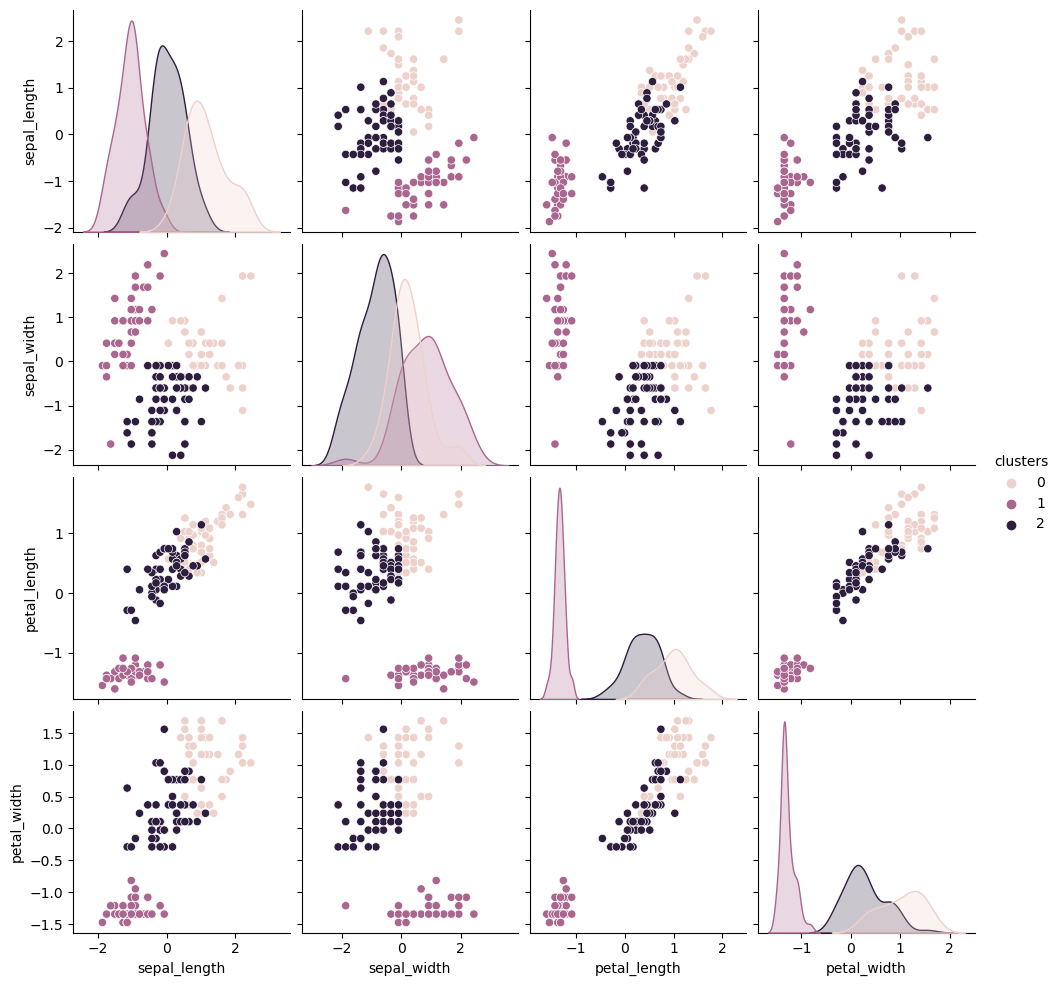

In [123]:
# plotting features of dataset against clusters
sns.pairplot(data_BC, hue="clusters")

plt.show()

In [124]:
# adding labels back to dataset
BC_completeDataset = data_BC
BC_completeDataset["class"] = y
# review complete dataset
AC_completeDataset

,sepal_length,sepal_width,petal_length,petal_width,clusters,class
103,1.736159,-0.347867,1.423380,0.765598,0,Iris-virginica
127,2.457980,1.937617,1.480488,1.029536,0,Iris-virginica
128,0.653429,-0.601809,1.023629,1.293473,0,Iris-virginica
66,0.051912,0.413961,0.566771,0.765598,0,Iris-versicolor
131,2.217373,-0.093924,1.309166,1.425441,0,Iris-virginica
132,0.533125,0.921846,1.023629,1.557410,0,Iris-virginica
133,0.653429,0.160019,0.966522,0.765598,0,Iris-virginica
61,1.014339,0.160019,0.338341,0.237724,0,Iris-versicolor
135,1.254946,0.160019,0.909414,1.161504,0,Iris-virginica
126,1.856463,-0.601809,1.309166,0.897567,0,Iris-virginica


### Model evaluation

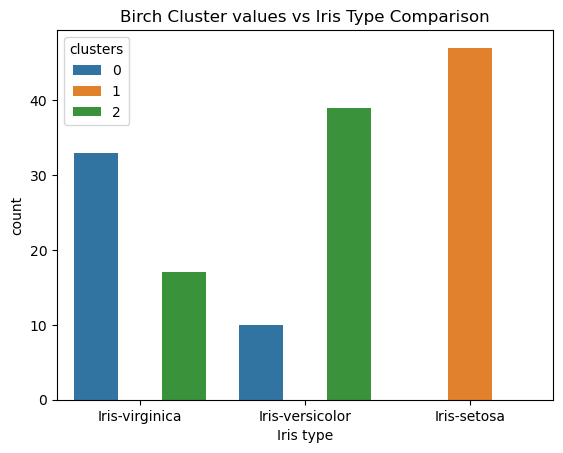

In [125]:
# plot comparing dataset labels to Birch cluster values
pl = sns.countplot(x=BC_completeDataset["class"], hue=BC_completeDataset["clusters"])
pl.set_title("Birch Cluster values vs Iris Type Comparison")
pl.set_xlabel("Iris type")
plt.show()